This notebook shows how to pre-process and invert ICESat-2 ATL15 data over subglacial lakes.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

First step: Choose a lake name from the Siegfried & Fricker (2018) inventory 

In [2]:
from load_lakes import gdf
print(gdf['name'].to_list())

['Bindschadler_1', 'Bindschadler_2', 'Bindschadler_3', 'Bindschadler_4', 'Bindschadler_5', 'Bindschadler_6', 'Byrd_1', 'Byrd_2', 'Byrd_s1', 'Byrd_s10', 'Byrd_s11', 'Byrd_s12', 'Byrd_s13', 'Byrd_s14', 'Byrd_s15', 'Byrd_s2', 'Byrd_s3', 'Byrd_s4', 'Byrd_s5', 'Byrd_s6', 'Byrd_s7', 'Byrd_s8', 'Byrd_s9', 'ConwaySubglacialLake', 'Cook_E1', 'Cook_E2', 'David_1', 'David_s1', 'David_s2', 'David_s3', 'David_s4', 'David_s5', 'EAP_1', 'EAP_2', 'EAP_3', 'EAP_4', 'EAP_5', 'EAP_6', 'EAP_7', 'EAP_8', 'EAP_9', 'EngelhardtSubglacialLake', 'Foundation_1', 'Foundation_10', 'Foundation_11', 'Foundation_12', 'Foundation_13', 'Foundation_14', 'Foundation_15', 'Foundation_16', 'Foundation_2', 'Foundation_3', 'Foundation_4', 'Foundation_5', 'Foundation_6', 'Foundation_7', 'Foundation_8', 'Foundation_9', 'Foundation_N1', 'Foundation_N2', 'Foundation_N3', 'Institute_E1', 'Institute_E2', 'Institute_W1', 'Institute_W2', 'KT1', 'KT2', 'KT3', 'Kamb_1', 'Kamb_10', 'Kamb_11', 'Kamb_12', 'Kamb_2', 'Kamb_3', 'Kamb_4', 'K

In [3]:
import metavars
metavars.lake_name = 'Byrd_s10'
lake_name = metavars.lake_name

You can also set lake_name = 'synth' for the synthetic example

Next, define paths to data directories (modify as necessary!)

See README for links to download the data

In [4]:
paths = {}
paths['icesat'] = '../../../ICESat-2/ATL15/ATL15_AA_0314_01km_002_02.nc'
paths['wavi'] = '../../../WAVI/WAVI_5km_Initial.nc'
paths['measures'] = '../../../measures/antarctic_ice_vel_phase_map_v01.nc'
paths['bedmachine'] = '../../../bedmachine/BedMachineAntarctica-v3.nc'

Next we pre-process the ICESat-2 data for use in the inversion... this can take several (15+) minutes!

This step is skipped if the data already exists.

You can edit certain aspects of the pre-processing, like the size of the bounding box around the lake, by modifying proc_icesat_data.py

In [5]:
from proc_icesat_data import proc_data
from make_synth_data import make_data
import os 
if os.path.isfile('../data_'+lake_name+'/h_obs.npy')==False: 
    if lake_name != 'synth' and lake_name !='nonlinear':
        proc_data(lake_name,paths)
    elif lake_name == 'synth':  
        make_data()
    elif lake_name == 'nonlinear':
        print('run fenics code to produce nonlinear synthetic data')     

Next we will run the inversion.

In [6]:
# example script that runs the inversion
from inversion import invert
import numpy as np
from params import data_dir,Nt
from plot_results import plot
from print_params import print_params

Print the auxiliar parameters (ice thickness, basal drag, viscosity, velocities):

In [7]:
# print the auxiliary model parameters
print_params()

auxiliary model parameters:
H = 2.676440185546875 km
beta = 1.40e+11 Pa s m^-1
eta = 4.97e+15 Pa s
u = -9.40271065957805 m yr^-1
v = -9.795797504488833 m yr^-1


Invert the data:

In [8]:
# load elevation data (h_obs)
h_obs = np.load(data_dir+'/h_obs.npy')

# set regularization parameter
eps = 1e0

# set reference time to define elevation anomaly
t_ref = 0 # probably should set t_ref = 1.25 for SLM

In [9]:
# solve for the basal vertical velocity inversion
w_map,h_fwd,mis = invert(h_obs,eps=eps,t_ref=t_ref)

Solving normal equations with CG....

CG iter. 490: rel. residual norm = 1.09e-06,  tol = 1.00e-06 
...CG converged!



Plot the results:

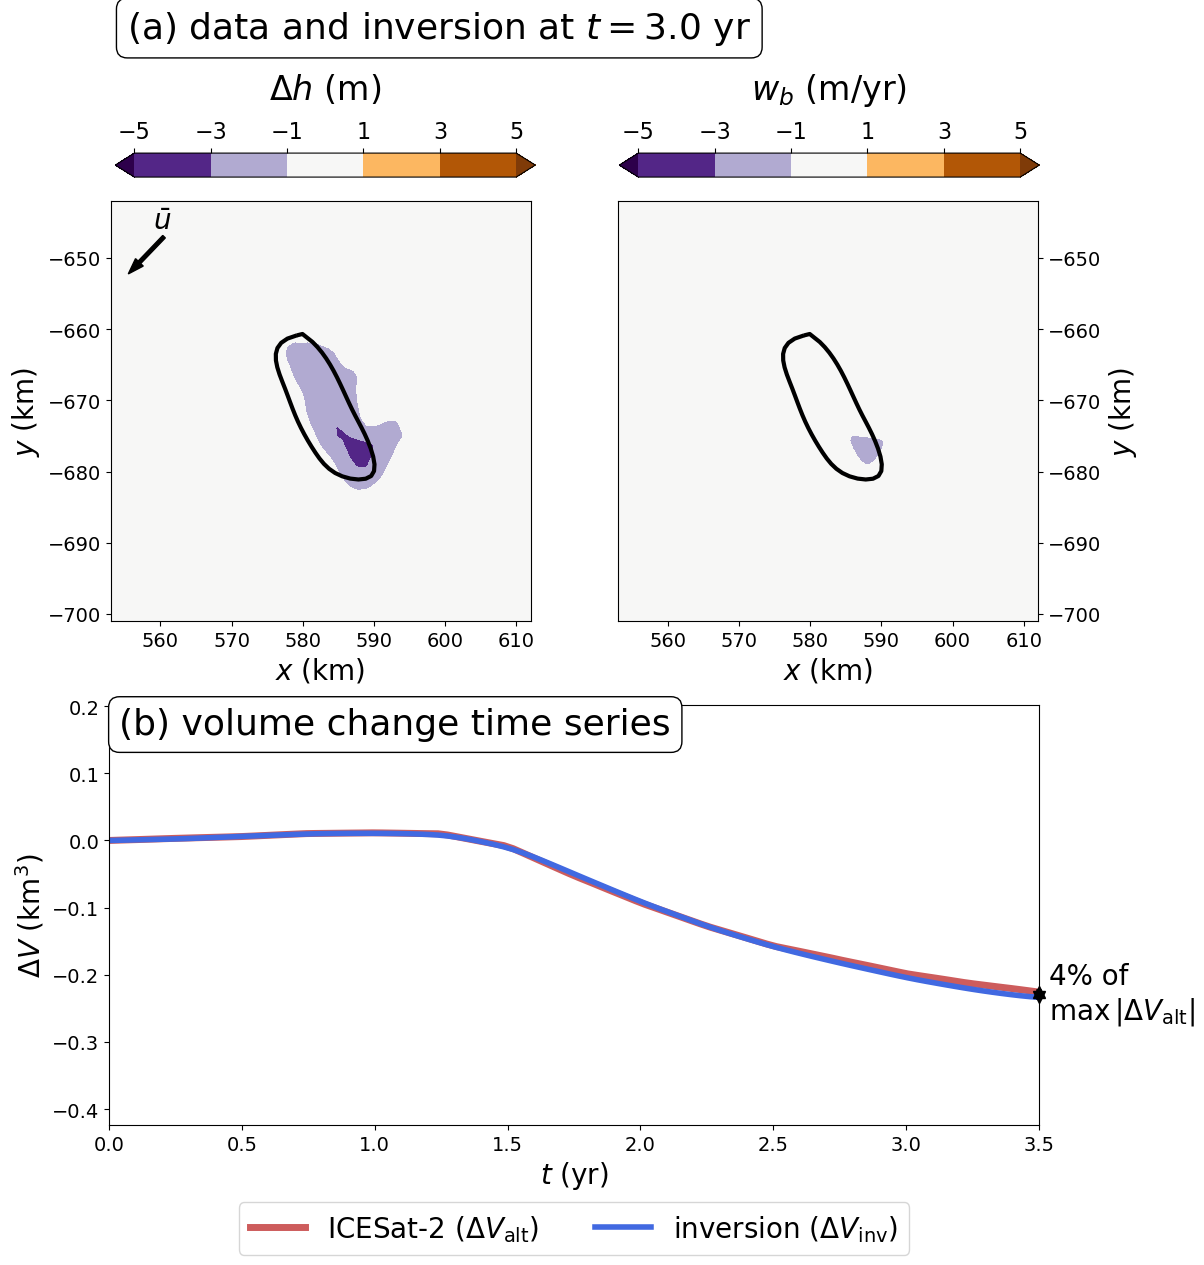

In [10]:
# set the contour plot limits for the elevation and inversion with h_lim and w_lim, resp.
h_lim = 5
w_lim = 5
# timesteps = range(Nt)   # set timesteps to list with length >1 to make a movie
timesteps = [85]        # set timesteps to list with length == 1 to print single snapshot
plot(t_ref,timesteps=timesteps,h_lim=h_lim,w_lim=w_lim)   